<a href="https://colab.research.google.com/github/LQMinh528/AI/blob/main/W9_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()


In [30]:
train_images.shape

(60000, 28, 28)

In [31]:
train_labels.shape

(60000,)

In [32]:
test_images.shape

(10000, 28, 28)

In [33]:
test_labels.shape

(10000,)

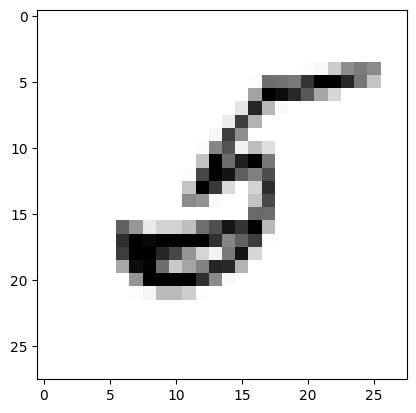

số: 5


In [34]:
import matplotlib.pyplot as plt
digit = train_images[1111]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print("số:", train_labels[1111])

<ipython-input-35-c934fe32a57a>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(3,6,i+1)


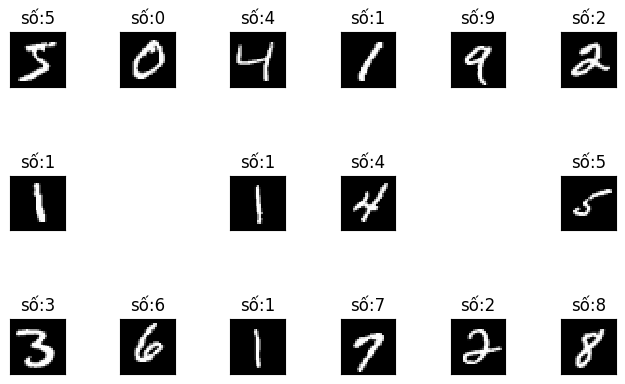

In [35]:
for i in range(18):
  plt.subplot(3,6,i+1)
  plt.tight_layout()
  plt.imshow(train_images[i], cmap='gray', 
             interpolation = 'none')
  plt.title('số:{}'.format(train_labels[i]) )
  plt.xticks([])
  plt.yticks([])

In [36]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(512, activation='relu', input_shape = (28*28,)))
model.add(Dense(10,activation = 'softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               401920    
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [37]:
X = test_images
Y = test_labels

train_images = train_images.reshape(60000,28*28)
train_images = train_images.astype('float32')/255
test_images = test_images.reshape(10000,28*28)
test_images = test_images.astype('float32')/255

In [38]:
train_images.shape

(60000, 784)

In [39]:
test_images.shape

(10000, 784)

In [40]:
from keras.utils import to_categorical
train_labels = to_categorical(train_labels,10)
test_labels = to_categorical(test_labels,10)

In [41]:
train_labels.shape

(60000, 10)

In [42]:
test_labels.shape

(10000, 10)

In [45]:
model.compile(optimizer = 'rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 10, batch_size = 128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Mất mát: ', test_loss)
print('Độ chính xác: ', test_acc)

Epoch 1/10
469/469 [==============================] - 5s 10ms/step - loss: 0.2650 - accuracy: 0.9236
Epoch 2/10
469/469 [==============================] - 6s 12ms/step - loss: 0.1074 - accuracy: 0.9682
Epoch 3/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0706 - accuracy: 0.9789
Epoch 4/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0498 - accuracy: 0.9854
Epoch 5/10
469/469 [==============================] - 6s 12ms/step - loss: 0.0376 - accuracy: 0.9890
Epoch 6/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0286 - accuracy: 0.9918
Epoch 7/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0214 - accuracy: 0.9937
Epoch 8/10
469/469 [==============================] - 5s 11ms/step - loss: 0.0163 - accuracy: 0.9954
Epoch 9/10
469/469 [==============================] - 5s 10ms/step - loss: 0.0122 - accuracy: 0.9969
Epoch 10/10
313/313 [==============================] - 1s 4ms/step - loss: 0.0640 - accurac

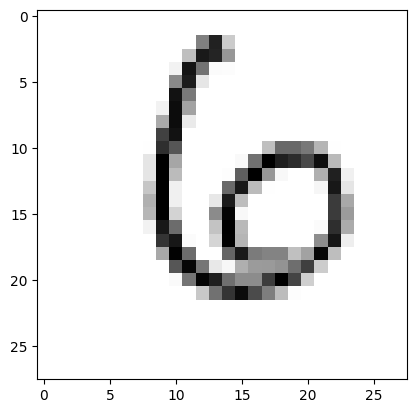

số: 6


In [50]:
import matplotlib.pyplot as plt
digit = X[100]
plt.imshow(digit,cmap=plt.cm.binary)
plt.show()
print("số:", Y[100])

In [62]:
x_pred = X[500].reshape(1,28*28)
x_pred = x_pred.astype('float32')/255

y_pred = model.predict(x_pred)
print(y_pred)


1/1 [==============================] - 0s 31ms/step
[[1.63857927e-19 1.12444225e-14 8.23250159e-14 1.00000000e+00
  3.91877901e-22 4.82336610e-13 1.71293415e-23 8.27149114e-17
  1.34324572e-13 3.14418769e-11]]


In [63]:
import numpy as np
np.argmax(model.predict(x_pred),axis=1)

1/1 [==============================] - 0s 21ms/step


array([3])